# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s np
("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [6]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,233
Treatment,165


col_0,Frequency
status,
Control,0.585427
Treatment,0.414573


<font size = "5">

Query with string conditions

In [7]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [8]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,23.721818,5.381818,188.715152,2943.418182,15.476364
std,7.616414,1.676497,101.647094,848.818570,2.650791
min,10.000000,3.000000,70.000000,1613.000000,9.500000
25%,17.600000,4.000000,98.000000,2223.000000,14.000000
50%,23.700000,4.000000,151.000000,2755.000000,15.200000
75%,29.500000,6.000000,250.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,23.367811,5.506438,196.763948,2989.549356,15.633047
std,7.967301,1.719864,106.176496,846.744689,2.834802
min,9.000000,3.000000,68.000000,1773.000000,8.000000
25%,17.000000,4.000000,105.000000,2226.000000,13.800000
50%,22.000000,4.000000,144.000000,2868.000000,15.500000
75%,29.000000,8.000000,302.000000,3632.000000,17.500000
max,46.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [15]:

def fn_weight(weight):
    if (weight>=3000):
        status ="good"
    elif(weight>=2500):
        status ="nice"
    else:
        status ="ok"
    return (status)

carfeatures["weightint"]    = carfeatures["weight"].apply(fn_weight)
display(carfeatures["weightint"])


0      good
1      good
2      good
3      good
4      good
       ... 
393    nice
394      ok
395      ok
396    nice
397    nice
Name: weightint, Length: 398, dtype: object

<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [19]:
# mean median se
print(carfeatures["weight"].mean())
print(carfeatures["weight"].median())
print(carfeatures["weight"].std())



# subset
list_subsetcols     = ["weight","mpg"]
subcols_carfeatures = carfeatures[list_subsetcols]
display(subcols_carfeatures)
display(carfeatures[["weight","mpg"]])



2970.424623115578
2803.5
846.8417741973271


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [21]:
weightascend = carfeatures.sort_values(by = "weight",ascending = False)
display(weightascend.iloc[0,:])

mpg                  13.0
cylinders               8
displacement          400
horsepower            175
weight               5140
acceleration         12.0
vehicle_id      P-1690264
status          Treatment
mpginteger             13
weightint            good
Name: 44, dtype: object

<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [25]:
#这个小问没太确定
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)
carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)
data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')
display(data_treated)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,mpginteger,weightint
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,17,good
5,15.0,8,429,198,4341,10.0,F-1689835,Treatment,15,good
6,14.0,8,454,220,4354,9.0,C-1689846,Treatment,14,good
9,15.0,8,390,190,3850,8.5,A-1689879,Treatment,15,good
12,15.0,8,400,150,3761,9.5,C-1689912,Treatment,15,good
...,...,...,...,...,...,...,...,...,...,...
386,25.0,6,181,110,2945,16.4,B-1694026,Treatment,25,nice
389,22.0,6,232,112,2835,14.7,F-1694059,Treatment,22,nice
392,27.0,4,151,90,2950,17.3,C-1694092,Treatment,27,nice
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment,32,ok


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [36]:
#这个怎么能和d扯上关系啊???
def f(y, x, b0, b1):
    fx =y+ b1*x+ b0
    print(fx)

 




<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

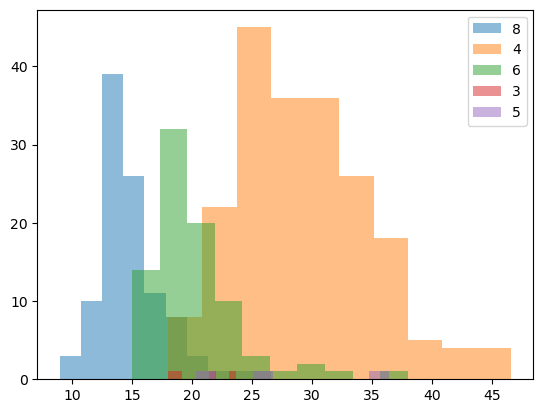

In [37]:
list_unique_cylinders = pd.unique(carfeatures["cylinders"])

for category_value in list_unique_cylinders:
    temporarydataframe = carfeatures.query("cylinders == @category_value")
    plt.hist(temporarydataframe["mpg"],alpha = 0.5)

plt.legend(labels = list_unique_cylinders)
